In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.image as mpimg
from skimage import io
import importDataSet
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
print(tf.__version__)

1.0.1


In [3]:
location = "/media/yigit/YEDEK320/final_dataset/"  # Location of the dataset
locationSSD = "/media/yigit/2E58D09A58D0625F/tf"
itemNumbers=[0,0,0]
totalNumberOfImages = 0;
nameDataset = {}

In [4]:
verbose = 1


In [5]:
totalNumberOfImages, nameDataset, itemNumbers = importDataSet.findTheFiles(location=location,verbose=0)



16917
/media/yigit/YEDEK320/final_dataset/set3/frame03254_set3_1.png
[ 1. -1. -1.]
2720
/media/yigit/YEDEK320/final_dataset/set1/frame01356_set1_0.png
[ 1. -1. -1.]
17112
/media/yigit/YEDEK320/final_dataset/set3/frame03351_set3_0.png
[ 1. -1.  1.]
16700
/media/yigit/YEDEK320/final_dataset/set3/frame03146_set3_0.png
[ 1. -1. -1.]
4568
/media/yigit/YEDEK320/final_dataset/set1/frame02289_set1_0.png
[ 1. -1. -1.]
6277
/media/yigit/YEDEK320/final_dataset/set2/frame00357_set2_1.png
[ 1. -1.  1.]
7497
/media/yigit/YEDEK320/final_dataset/set2/frame00958_set2_0.png
[ 1. -1.  1.]
16283
/media/yigit/YEDEK320/final_dataset/set3/frame02939_set3_0.png
[ 1. -1. -1.]
9396
/media/yigit/YEDEK320/final_dataset/set2/frame01911_set2_0.png
[ 1. -1.  1.]


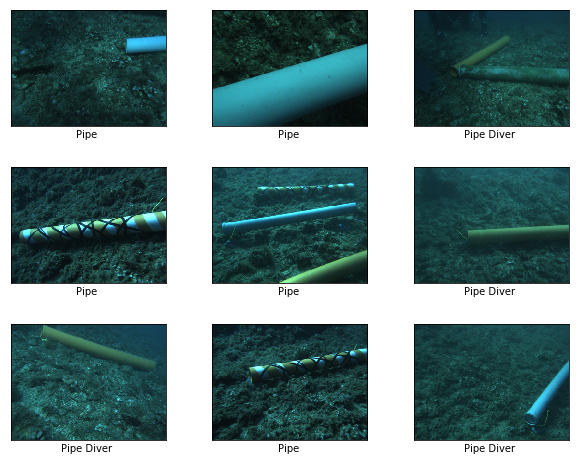

There are total 19191 images in the dataset
There are 14162 pipe-containing image
There are 2942 cable-containing image
There are 8808 diver-containing image


In [6]:
importDataSet.showSomeSamples(nameDataset)
if verbose == 1:
    items = ["pipe","cable","diver"]
    print("There are total {0} images in the dataset".format(totalNumberOfImages))
    for i, item in enumerate(itemNumbers):
        print("There are {0} {1}-containing image".format(item, items[i]))

    # for item in nameDataset.keys():
    #     print(item + "-->")
    #     print(nameDataset[item])



If the tfrecord file is not created, comment out this sction to create the tf record.

In [7]:
#file_list = importDataSet.writeTfrecords(nameDataset, location+"tf/", how_many_files=totalNumberOfImages, verbose= 0)

Just to check if the file is created correctly

In [8]:
# imageBatch,labelBatch = importDataSet.getBatchFromFile(location+"tf/",n_batch=200,sess=sess)

# print(imageBatch.shape,labelBatch.shape)
# importDataSet.showObtainedImages(imageBatch,  labelBatch)

In [9]:
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)

imageSet, labels = importDataSet.importAllDataSet(locationSSD, totalNumberOfImages, session=sess)

In [10]:
print(imageSet.shape,labels.shape)
print(np.result_type(imageSet))

(19191, 240, 320, 3) (19191, 3)
uint8


In [11]:
trainSet, trainLabels = [imageSet[0:int(imageSet.shape[0]*0.8)], labels[0:int(labels.shape[0]*0.8)]]
print(trainSet.shape, trainLabels.shape)
trainSize = trainSet.shape[0]
validationSet, validationLabels = [imageSet[int(imageSet.shape[0]*0.8):], labels[int(labels.shape[0]*0.8):]]
print(validationSet.shape, validationLabels.shape)
validationSize = validationSet.shape[0]

(15352, 240, 320, 3) (15352, 3)
(3839, 240, 320, 3) (3839, 3)


In [12]:
import weaklySupervisedObjectDetectionNetwork as WSODN

In [13]:
WSCNN = WSODN.WSCNN("./vgg16_weights.npz", sess)  # initialize the network

batch_index = np.random.choice(trainSize, 16)
# print(batch_index)
# print(trainSet[batch_index].shape)
# print(trainLabels[batch_index].shape)
loss = tf.reduce_sum(1+tf.exp(-1*WSCNN.labels*WSCNN.overAllScore))*(1./3.)
optimizer = tf.train.AdamOptimizer(learning_rate=1e-3).minimize(loss)

asd = sess.run(loss,feed_dict={WSCNN.batch:trainSet[batch_index], WSCNN.labels:trainLabels[batch_index]})
print(asd)

['conv1_1_W', 'conv1_1_b', 'conv1_2_W', 'conv1_2_b', 'conv2_1_W', 'conv2_1_b', 'conv2_2_W', 'conv2_2_b', 'conv3_1_W', 'conv3_1_b', 'conv3_2_W', 'conv3_2_b', 'conv3_3_W', 'conv3_3_b', 'conv4_1_W', 'conv4_1_b', 'conv4_2_W', 'conv4_2_b', 'conv4_3_W', 'conv4_3_b', 'conv5_1_W', 'conv5_1_b', 'conv5_2_W', 'conv5_2_b', 'conv5_3_W', 'conv5_3_b', 'fc6_W', 'fc6_b', 'fc7_W', 'fc7_b', 'fc8_W', 'fc8_b']
Name: conv1_1, Shape = (3, 3, 3, 64)
Name: conv1_2, Shape = (3, 3, 64, 64)
Name: conv2_1, Shape = (3, 3, 64, 128)
Name: conv2_2, Shape = (3, 3, 128, 128)
Name: conv3_1, Shape = (3, 3, 128, 256)
Name: conv3_2, Shape = (3, 3, 256, 256)
Name: conv3_3, Shape = (3, 3, 256, 256)
[[ 160.  160.]
 [ 240.  240.]
 [ 320.  320.]
 [ 480.  480.]]
(?, 240, 320, 3)
(?, 320, 320, 3)
(?, 3)
360.689
